In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
import joblib
import pickle

In [10]:
df1 = pd.read_csv('C:/Users/nilka/OneDrive/Desktop/cleaned_data.csv')
df1.head()

,User ID,Age,Gender,Height,Looking For,Children,Education Level,Occupation,Frequency of Usage
0,1,30,Male,5.2,Casual Dating,No,High School,Engineer/Student,Weekly
1,2,27,Female,4.9,Friendship,Yes,Master's Degree,Artist,Monthly
2,3,29,Female,5.8,Casual Dating,No,Bachelor's Degree,Social Media Influencer,Daily
3,4,29,Female,5.1,Marriage,No,Ph.D.,Doctor,Daily
4,5,32,Male,6.0,Marriage,Yes,Ph.D.,Engineer/Student,Monthly


In [11]:
df1.drop(columns=['Interests', 'Swiping History'], inplace=True, errors='ignore')
df1

,User ID,Age,Gender,Height,Looking For,Children,Education Level,Occupation,Frequency of Usage
0,1,30,Male,5.2,Casual Dating,No,High School,Engineer/Student,Weekly
1,2,27,Female,4.9,Friendship,Yes,Master's Degree,Artist,Monthly
2,3,29,Female,5.8,Casual Dating,No,Bachelor's Degree,Social Media Influencer,Daily
3,4,29,Female,5.1,Marriage,No,Ph.D.,Doctor,Daily
4,5,32,Male,6.0,Marriage,Yes,Ph.D.,Engineer/Student,Monthly
...,...,...,...,...,...,...,...,...,...
495,496,27,Male,5.3,Marriage,No,Bachelor's Degree,Entrepreneur,Daily
496,497,30,Female,5.1,Marriage,No,High School,Social Media Influencer,Daily
497,498,33,Male,4.9,Marriage,No,Bachelor's Degree,Engineer/Student,Daily
498,499,32,Male,5.6,Marriage,Maybe,High School,Business Owner,Monthly


In [12]:
df1['Looking For'] = df1['Looking For'].replace(['Casual Dating', 'Friendship'], 'Casual Dating')
df1

,User ID,Age,Gender,Height,Looking For,Children,Education Level,Occupation,Frequency of Usage
0,1,30,Male,5.2,Casual Dating,No,High School,Engineer/Student,Weekly
1,2,27,Female,4.9,Casual Dating,Yes,Master's Degree,Artist,Monthly
2,3,29,Female,5.8,Casual Dating,No,Bachelor's Degree,Social Media Influencer,Daily
3,4,29,Female,5.1,Marriage,No,Ph.D.,Doctor,Daily
4,5,32,Male,6.0,Marriage,Yes,Ph.D.,Engineer/Student,Monthly
...,...,...,...,...,...,...,...,...,...
495,496,27,Male,5.3,Marriage,No,Bachelor's Degree,Entrepreneur,Daily
496,497,30,Female,5.1,Marriage,No,High School,Social Media Influencer,Daily
497,498,33,Male,4.9,Marriage,No,Bachelor's Degree,Engineer/Student,Daily
498,499,32,Male,5.6,Marriage,Maybe,High School,Business Owner,Monthly


In [13]:
df1['Looking For'].unique()

array(['Casual Dating', 'Marriage'], dtype=object)

In [14]:
df1.to_csv('cleaned.csv', index=False)

In [16]:
df1['Gender'] = df1['Gender'].map({'Female': 0, 'Male': 1})
df1

,User ID,Age,Gender,Height,Looking For,Children,Education Level,Occupation,Frequency of Usage
0,1,30,1,5.2,Casual Dating,No,High School,Engineer/Student,Weekly
1,2,27,0,4.9,Casual Dating,Yes,Master's Degree,Artist,Monthly
2,3,29,0,5.8,Casual Dating,No,Bachelor's Degree,Social Media Influencer,Daily
3,4,29,0,5.1,Marriage,No,Ph.D.,Doctor,Daily
4,5,32,1,6.0,Marriage,Yes,Ph.D.,Engineer/Student,Monthly
...,...,...,...,...,...,...,...,...,...
495,496,27,1,5.3,Marriage,No,Bachelor's Degree,Entrepreneur,Daily
496,497,30,0,5.1,Marriage,No,High School,Social Media Influencer,Daily
497,498,33,1,4.9,Marriage,No,Bachelor's Degree,Engineer/Student,Daily
498,499,32,1,5.6,Marriage,Maybe,High School,Business Owner,Monthly


In [17]:
df1['Children'] = df1['Children'].map({'No': 0, 'Yes': 1,'Maybe':2})
df1

,User ID,Age,Gender,Height,Looking For,Children,Education Level,Occupation,Frequency of Usage
0,1,30,1,5.2,Casual Dating,0,High School,Engineer/Student,Weekly
1,2,27,0,4.9,Casual Dating,1,Master's Degree,Artist,Monthly
2,3,29,0,5.8,Casual Dating,0,Bachelor's Degree,Social Media Influencer,Daily
3,4,29,0,5.1,Marriage,0,Ph.D.,Doctor,Daily
4,5,32,1,6.0,Marriage,1,Ph.D.,Engineer/Student,Monthly
...,...,...,...,...,...,...,...,...,...
495,496,27,1,5.3,Marriage,0,Bachelor's Degree,Entrepreneur,Daily
496,497,30,0,5.1,Marriage,0,High School,Social Media Influencer,Daily
497,498,33,1,4.9,Marriage,0,Bachelor's Degree,Engineer/Student,Daily
498,499,32,1,5.6,Marriage,2,High School,Business Owner,Monthly


In [26]:
df1['Looking For'] = df1['Looking For'].map({'Casual Dating': 0, 'Marriage': 1})
df1

,User ID,Age,Gender,Height,Looking For,Children,Education Level,Occupation,Frequency of Usage
0,1,30,1,5.2,0,0,High School,Engineer/Student,Weekly
1,2,27,0,4.9,0,1,Master's Degree,Artist,Monthly
2,3,29,0,5.8,0,0,Bachelor's Degree,Social Media Influencer,Daily
3,4,29,0,5.1,1,0,Ph.D.,Doctor,Daily
4,5,32,1,6.0,1,1,Ph.D.,Engineer/Student,Monthly
...,...,...,...,...,...,...,...,...,...
495,496,27,1,5.3,1,0,Bachelor's Degree,Entrepreneur,Daily
496,497,30,0,5.1,1,0,High School,Social Media Influencer,Daily
497,498,33,1,4.9,1,0,Bachelor's Degree,Engineer/Student,Daily
498,499,32,1,5.6,1,2,High School,Business Owner,Monthly


In [32]:
df2 = df1[['User ID', 'Age','Gender' ,'Height' ,'Looking For','Children']]
df2

,User ID,Age,Gender,Height,Looking For,Children
0,1,30,1,5.2,0,0
1,2,27,0,4.9,0,1
2,3,29,0,5.8,0,0
3,4,29,0,5.1,1,0
4,5,32,1,6.0,1,1
...,...,...,...,...,...,...
495,496,27,1,5.3,1,0
496,497,30,0,5.1,1,0
497,498,33,1,4.9,1,0
498,499,32,1,5.6,1,2


In [33]:
Age = df2['Age'].value_counts()

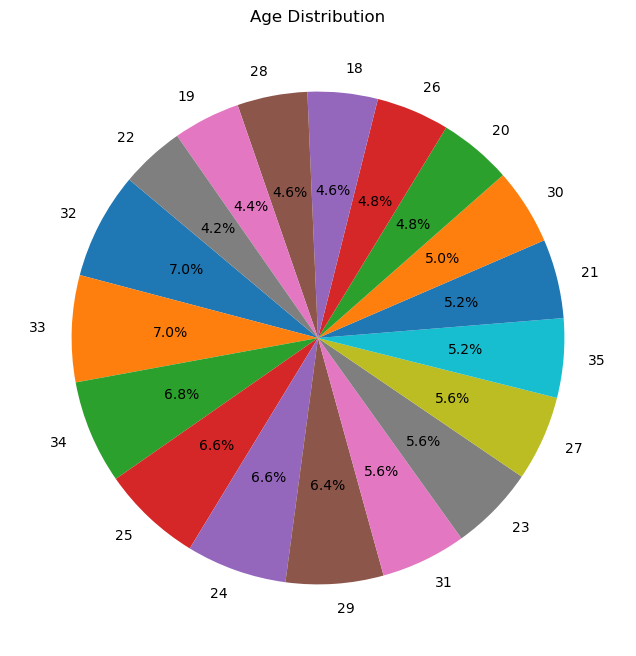

In [34]:
plt.figure(figsize=(8, 8))
plt.pie(Age, labels=Age.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution')
plt.show()

In [38]:
X = df2.drop(['Gender'],axis='columns')
X.head(3)

,User ID,Age,Height,Looking For,Children
0,1,30,5.2,0,0
1,2,27,4.9,0,1
2,3,29,5.8,0,0


In [39]:
y = df2.Gender
y.head(3)

0    1
1    0
2    0
Name: Gender, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [41]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

-0.06400095631297797

In [42]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([-0.01836797, -0.03191422,  0.01000997, -0.02836085, -0.02618311])

In [46]:
df1

,User ID,Age,Gender,Height,Looking For,Children,Education Level,Occupation,Frequency of Usage
0,1,30,1,5.2,0,0,High School,Engineer/Student,Weekly
1,2,27,0,4.9,0,1,Master's Degree,Artist,Monthly
2,3,29,0,5.8,0,0,Bachelor's Degree,Social Media Influencer,Daily
3,4,29,0,5.1,1,0,Ph.D.,Doctor,Daily
4,5,32,1,6.0,1,1,Ph.D.,Engineer/Student,Monthly
...,...,...,...,...,...,...,...,...,...
495,496,27,1,5.3,1,0,Bachelor's Degree,Entrepreneur,Daily
496,497,30,0,5.1,1,0,High School,Social Media Influencer,Daily
497,498,33,1,4.9,1,0,Bachelor's Degree,Engineer/Student,Daily
498,499,32,1,5.6,1,2,High School,Business Owner,Monthly


In [53]:
df3 = df1.rename(columns={'Education Level': 'Education'})
df3

,User ID,Age,Gender,Height,Looking For,Children,Education,Occupation,Frequency of Usage
0,1,30,1,5.2,0,0,High School,Engineer/Student,Weekly
1,2,27,0,4.9,0,1,Master's Degree,Artist,Monthly
2,3,29,0,5.8,0,0,Bachelor's Degree,Social Media Influencer,Daily
3,4,29,0,5.1,1,0,Ph.D.,Doctor,Daily
4,5,32,1,6.0,1,1,Ph.D.,Engineer/Student,Monthly
...,...,...,...,...,...,...,...,...,...
495,496,27,1,5.3,1,0,Bachelor's Degree,Entrepreneur,Daily
496,497,30,0,5.1,1,0,High School,Social Media Influencer,Daily
497,498,33,1,4.9,1,0,Bachelor's Degree,Engineer/Student,Daily
498,499,32,1,5.6,1,2,High School,Business Owner,Monthly


In [61]:
df4 = df3.rename(columns={'Frequency of Usage': 'Usage'})
df4

,User ID,Age,Gender,Height,Looking For,Children,Education,Occupation,Usage,A
0,1,30,1,5.2,0,0,High School,Engineer/Student,Weekly,High School
1,2,27,0,4.9,0,1,Master's Degree,Artist,Monthly,Master's Degree
2,3,29,0,5.8,0,0,Bachelor's Degree,Social Media Influencer,Daily,Bachelor's Degree
3,4,29,0,5.1,1,0,Ph.D.,Doctor,Daily,Ph.D.
4,5,32,1,6.0,1,1,Ph.D.,Engineer/Student,Monthly,Ph.D.
...,...,...,...,...,...,...,...,...,...,...
495,496,27,1,5.3,1,0,Bachelor's Degree,Entrepreneur,Daily,Bachelor's Degree
496,497,30,0,5.1,1,0,High School,Social Media Influencer,Daily,High School
497,498,33,1,4.9,1,0,Bachelor's Degree,Engineer/Student,Daily,Bachelor's Degree
498,499,32,1,5.6,1,2,High School,Business Owner,Monthly,High School


In [67]:
edu= pd.get_dummies(df4.Education)
edu.head(3)

,Bachelor's Degree,High School,Master's Degree,Ph.D.
0,False,True,False,False
1,False,False,True,False
2,True,False,False,False


In [68]:
occ=pd.get_dummies(df4.Occupation)
occ.head(3)

,Artist,Business Owner,Doctor,Engineer/Student,Entrepreneur,Social Media Influencer,Teacher
0,False,False,False,True,False,False,False
1,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False


In [69]:
use=pd.get_dummies(df4.Usage)
use.head(3)

,Daily,Monthly,Weekly
0,False,False,True
1,False,True,False
2,True,False,False


In [70]:
df4.columns.tolist()

['User ID',
 'Age',
 'Gender',
 'Height',
 'Looking For',
 'Children',
 'Education',
 'Occupation',
 'Usage',
 'A']

In [71]:
df5 = pd.concat([df4, edu, occ,use], axis=1)
df5

,User ID,Age,Gender,Height,Looking For,Children,Education,Occupation,Usage,A,...,Artist,Business Owner,Doctor,Engineer/Student,Entrepreneur,Social Media Influencer,Teacher,Daily,Monthly,Weekly
0,1,30,1,5.2,0,0,High School,Engineer/Student,Weekly,High School,...,False,False,False,True,False,False,False,False,False,True
1,2,27,0,4.9,0,1,Master's Degree,Artist,Monthly,Master's Degree,...,True,False,False,False,False,False,False,False,True,False
2,3,29,0,5.8,0,0,Bachelor's Degree,Social Media Influencer,Daily,Bachelor's Degree,...,False,False,False,False,False,True,False,True,False,False
3,4,29,0,5.1,1,0,Ph.D.,Doctor,Daily,Ph.D.,...,False,False,True,False,False,False,False,True,False,False
4,5,32,1,6.0,1,1,Ph.D.,Engineer/Student,Monthly,Ph.D.,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,27,1,5.3,1,0,Bachelor's Degree,Entrepreneur,Daily,Bachelor's Degree,...,False,False,False,False,True,False,False,True,False,False
496,497,30,0,5.1,1,0,High School,Social Media Influencer,Daily,High School,...,False,False,False,False,False,True,False,True,False,False
497,498,33,1,4.9,1,0,Bachelor's Degree,Engineer/Student,Daily,Bachelor's Degree,...,False,False,False,True,False,False,False,True,False,False
498,499,32,1,5.6,1,2,High School,Business Owner,Monthly,High School,...,False,True,False,False,False,False,False,False,True,False


In [72]:
df5.columns.tolist()

['User ID',
 'Age',
 'Gender',
 'Height',
 'Looking For',
 'Children',
 'Education',
 'Occupation',
 'Usage',
 'A',
 "Bachelor's Degree",
 'High School',
 "Master's Degree",
 'Ph.D.',
 'Artist',
 'Business Owner',
 'Doctor',
 'Engineer/Student',
 'Entrepreneur',
 'Social Media Influencer',
 'Teacher',
 'Daily',
 'Monthly',
 'Weekly']

In [76]:
df5.drop(columns=['A', 'Usage','Occupation','Education','Children'], inplace=True, errors='ignore')

In [77]:
df5

,User ID,Age,Gender,Height,Looking For,Bachelor's Degree,High School,Master's Degree,Ph.D.,Artist,Business Owner,Doctor,Engineer/Student,Entrepreneur,Social Media Influencer,Teacher,Daily,Monthly,Weekly
0,1,30,1,5.2,0,False,True,False,False,False,False,False,True,False,False,False,False,False,True
1,2,27,0,4.9,0,False,False,True,False,True,False,False,False,False,False,False,False,True,False
2,3,29,0,5.8,0,True,False,False,False,False,False,False,False,False,True,False,True,False,False
3,4,29,0,5.1,1,False,False,False,True,False,False,True,False,False,False,False,True,False,False
4,5,32,1,6.0,1,False,False,False,True,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,27,1,5.3,1,True,False,False,False,False,False,False,False,True,False,False,True,False,False
496,497,30,0,5.1,1,False,True,False,False,False,False,False,False,False,True,False,True,False,False
497,498,33,1,4.9,1,True,False,False,False,False,False,False,True,False,False,False,True,False,False
498,499,32,1,5.6,1,False,True,False,False,False,True,False,False,False,False,False,False,True,False


In [78]:
df6 = df5.replace({True: 1, False: 0})
df6

C:\Users\nilka\AppData\Local\Temp\ipykernel_2140\3758422739.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df6 = df5.replace({True: 1, False: 0})


,User ID,Age,Gender,Height,Looking For,Bachelor's Degree,High School,Master's Degree,Ph.D.,Artist,Business Owner,Doctor,Engineer/Student,Entrepreneur,Social Media Influencer,Teacher,Daily,Monthly,Weekly
0,1,30,1,5.2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,2,27,0,4.9,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,3,29,0,5.8,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,4,29,0,5.1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,5,32,1,6.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,27,1,5.3,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0
496,497,30,0,5.1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
497,498,33,1,4.9,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0
498,499,32,1,5.6,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [103]:
df6.fillna(0)

,User ID,Age,Gender,Height,Looking For,Bachelor's Degree,High School,Master's Degree,Ph.D.,Artist,Business Owner,Doctor,Engineer/Student,Entrepreneur,Social Media Influencer,Teacher,Daily,Monthly,Weekly
0,1,30,1,5.2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,2,27,0,4.9,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,3,29,0,5.8,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,4,29,0,5.1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,5,32,1,6.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,27,1,5.3,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0
496,497,30,0,5.1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
497,498,33,1,4.9,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0
498,499,32,1,5.6,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [110]:
df6.drop('User ID', axis=1)

,Age,Gender,Height,Looking For,Bachelor's Degree,High School,Master's Degree,Ph.D.,Artist,Business Owner,Doctor,Engineer/Student,Entrepreneur,Social Media Influencer,Teacher,Daily,Monthly,Weekly
0,30,1,5.2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,27,0,4.9,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,29,0,5.8,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,29,0,5.1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,32,1,6.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,27,1,5.3,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0
496,30,0,5.1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
497,33,1,4.9,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0
498,32,1,5.6,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [117]:
df_combined = pd.concat([df6, user_input_df], ignore_index=True)

In [118]:
# Check for missing values (NaN)
print(df_combined.isnull().sum())

# Fill NaN values with 0
df_combined = df_combined.fillna(0)

User ID                      1
Age                          0
Gender                       0
Height                       0
Looking For                  0
Bachelor's Degree            0
High School                  0
Master's Degree              0
Ph.D.                        1
Artist                       0
Business Owner               0
Doctor                       0
Engineer/Student             0
Entrepreneur                 0
Social Media Influencer      0
Teacher                      0
Daily                        0
Monthly                      0
Weekly                       0
Ph.D                       500
dtype: int64


In [123]:
array = np.array(df6)

print(array)

[[  1.  30.   1. ...   0.   0.   1.]
 [  2.  27.   0. ...   0.   1.   0.]
 [  3.  29.   0. ...   1.   0.   0.]
 ...
 [498.  33.   1. ...   1.   0.   0.]
 [499.  32.   1. ...   0.   1.   0.]
 [500.  24.   1. ...   0.   1.   0.]]


In [139]:
df6 = pd.DataFrame(array)

# User's age
# User's gender (0: Female, 1: Male)
# User's height in feet
# Whether the user is looking for something (0: No, 1: Yes)
# Whether the user has a Bachelor's Degree (0: No, 1: Yes)
# Whether the user has completed High School (0: No, 1: Yes)
# Whether the user has a Master's Degree (0: No, 1: Yes)
# Whether the user has a Ph.D. (0: No, 1: Yes)
# Whether the user identifies as an Artist (0: No, 1: Yes)
# Whether the user identifies as a Business Owner (0: No, 1: Yes)
# Whether the user is a Doctor (0: No, 1: Yes)
# Whether the user is an Engineer or Student (0: No, 1: Yes)
# Whether the user identifies as an Entrepreneur (0: No, 1: Yes)
# Whether the user is a Social Media Influencer (0: No, 1: Yes)
# Whether the user is a Teacher (0: No, 1: Yes)
# Whether the user is available daily (0: No, 1: Yes)
# Whether the user is available monthly (0: No, 1: Yes)
# Whether the user is available weekly (0: No, 1: Yes)


user_input = [26, 1, 5.2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]

# Exclude the first element from the user input (Age, in this case)
user_input_modified = user_input[1:]

# Flip Gender (1 -> 0 and 0 -> 1) in the user input
user_input_modified[0] = 1 if user_input_modified[0] == 0 else 0  # Flipping Gender value

# Convert modified user input to a DataFrame for compatibility with cosine_similarity
user_input_df = pd.DataFrame([user_input_modified], columns=df6.columns[1:])  # Exclude first column from DataFrame

# Ensure the column name is 'Gender' before flipping
if 'Gender' in df6.columns:
    # Flip Gender (1 -> 0 and 0 -> 1) in the dataset
    df6['Gender'] = df6['Gender'].apply(lambda x: 1 if x == 0 else 0)
else:
    print("Gender column is not found in the dataset")

# Compute cosine similarity between user input and the DataFrame rows
similarities = cosine_similarity(user_input_df, df6.iloc[:, 1:])  # Exclude first column from dataset

# Get the indices of the top 3 most similar profiles
top_n = 3
top_n_indices = np.argsort(similarities[0])[::-1][:top_n]

# Print the indices and similarity scores of the top N most similar profiles
for i in top_n_indices:
    print(f"Profile Index: {i}, Similarity Score: {similarities[0][i]}")

Gender column is not found in the dataset
Profile Index: 414, Similarity Score: 0.11393616989035221
Profile Index: 52, Similarity Score: 0.11370708534561799
Profile Index: 369, Similarity Score: 0.11281507715234873
